## Functionality 2 - Find top superheroes!

As requested for this functionality, two outputs are given:
- Mean of the metric of the top N heros introduced.
- Metric of the especific node introduced


First we create a list containing only the top N heros in edges.csv. Then we calculate the input metric for every node in the graph, filter by only considering those heros in the top_n heros list, and then compute the mean of those heros' metrics. Finally we output the metric of the specific node inputed. Note that, given the time that takes computing betweenness centrality for the whole graph, we calculated in advanced and store it in a dictionary so its retrieval doesn't cause any issue. 
The output of our function is a dictionary, than contains the information of: node, metric, graph's metric and node's metric:

#### Graph's 1 example

In [32]:
functionality2(G1,"INVISIBLE WOMAN/SUE" , "DegreeCentrality", edges_df, 5, G1_betweenness)

{'Node': 'INVISIBLE WOMAN/SUE',
 'metric': 'Degree Centrality',
 'Graph_metric': array([0.29641745, 0.22056075, 0.23691589, 0.20077882, 0.27056075]),
 'Node_metric': 0.1925233644859813}

#### Graph's 2 example

In [34]:
functionality2(G2,"COC 1","DegreeCentrality", edges_df,5,G2_betweenness)

{'Node': 'COC 1',
 'metric': 'Degree Centrality',
 'Graph_metric': array([0.06988318, 0.06024412, 0.08261302, 0.0504479 , 0.0500812 ]),
 'Node_metric': 0.005814867201005815}

In [27]:
#Betweeness, PageRank, ClosenessCentrality, DegreeCentrality 
def functionality2(Graph, Node, metric, edges_df, N,betweenness):
    dict_output = {}   
    dict_output["Node"] = Node
    top_n = edges_df['hero'].value_counts().iloc[:N].index.tolist()
    #Metric
    if metric == "Betweeness":
        #graph
        dict_output["metric"] = "Betweeness Centrality"
        pd_page=pd.DataFrame.from_dict(betweenness,orient='index',columns=['centrality'])
        dict_output["Graph_metric"] = pd_page.centrality.values[pd_page.index.isin(top_n)]
        #node
        dict_output["Node_metric"] = G1_betweenness[Node]   
    elif metric == "PageRank":
        #graph
        dict_output["metric"] = "PageRank Centrality"
        m = nx.pagerank(Graph)
        pd_page=pd.DataFrame.from_dict(m,orient='index',columns=['centrality'])
        dict_output["Graph_metric"]  = pd_page.centrality.values[pd_page.index.isin(top_n)]
        #node
        dict_output["Node_metric"] = m[Node]
    elif metric == "ClosenessCentrality":
        #graph
        dict_output["metric"] = "Closeness Centrality"
        m = nx.closeness_centrality(Graph)
        pd_page=pd.DataFrame.from_dict(m,orient='index',columns=['centrality'])
        dict_output["Graph_metric"]  = pd_page.centrality.values[pd_page.index.isin(top_n)]
        #node
        dict_output["Node_metric"] = m[Node]
    elif metric == "DegreeCentrality":
        #graph
        dict_output["metric"] = "Degree Centrality"
        m = nx.degree_centrality(Graph)
        pd_page=pd.DataFrame.from_dict(m,orient='index',columns=['centrality'])
        dict_output["Graph_metric"] = pd_page.centrality.values[pd_page.index.isin(top_n)]
        #node
        dict_output["Node_metric"] = m[Node]
        
    return dict_output

## Visualization 2 - Visualize centrality measure

For a better visualization, we have created a function that shows in a table all the metrics of the top N heros of a given graph, and all the metrics of the specific node inputed.

In [28]:
def metric_table(graph,node, top_n, edges_df, betweenness):
    all_metrics = []
    all_lists = []
    metrics = ["Betweeness", "PageRank", "ClosenessCentrality", "DegreeCentrality"]
    for metric in metrics:
        f2 = functionality2(graph,node, metric, edges_df, top_n, betweenness)
        all_metrics.append(f2)
        all_lists.append([f2["metric"],f2["Node"],np.mean(f2["Graph_metric"]) , f2["Node_metric"]])

    table = [["Metric","Node","Mean of metric for top N heros", " Metric of Node"],all_lists[0], all_lists[1],all_lists[2],all_lists[3]]
    return tabulate(table, tablefmt='grid')

As requested for this functionality, two outputs are given:
 - Mean of the metric of the top N heros introduced.
 - Metric of the specific node introduced.

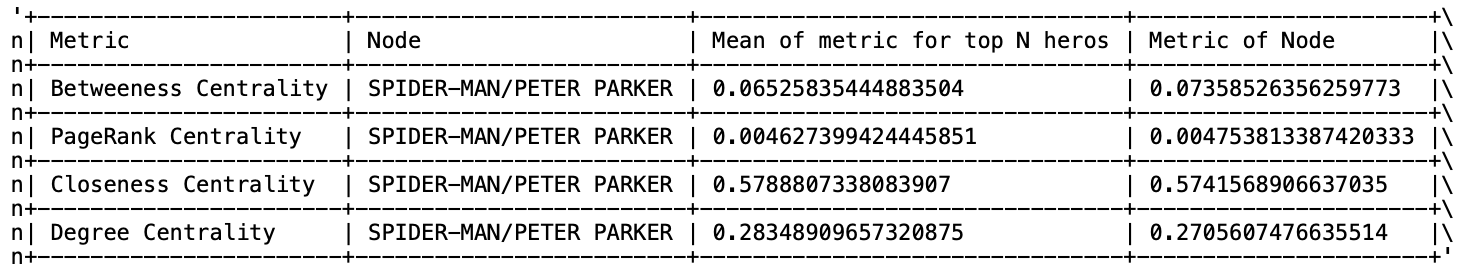

In [1]:
metric_table(G1,"SPIDER-MAN/PETER PARKER", 2, edges_df,G1_betweenness)

- **Betweeness Centrality**: tells us about the amount of influence a node has over the flow of whole graph. Spiderman's betweeness centrality score is the highest of the graph. It is calculated as the sum of all-pairs of shortest paths that pass through a node V, over the sum of all shortests paths between all nodes in the graph.
- **PageRank** Centrality: takes into account not only the amount of connections, but also the quality of those, the more influential they are, the higher the pagerank score will be. Spiderman's pagerank score is the highest of the graph.
- **Closeness Centrality**: measures how central is the node, it is calculated as the sum of all shortests paths to all nodes in the graph, and normalized by n-1 (the longest possible path). The bigger the metric, the more central a node is, actually Spiderman's 0.57 is the second highes closeness centrality in graph 1.
- **Degree Centrality**: it sums the weights of a node's connections, and then are normalized by dividing by n-1 where n is the number of nodes in G. Therefore, Spiderman's 0.27 is one on the highest of the graph 1.